In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.svm import SVR

In [3]:
train = pd.read_csv("C:/Users/afreen quraishi/Downloads/boston_housing data/train.csv")
test = pd.read_csv("C:/Users/afreen quraishi/Downloads/boston_housing data/test.csv")

In [4]:
train.drop('crim',axis=1,inplace=True)
train.drop('zn',axis=1,inplace=True)
train.drop('indus',axis=1,inplace=True)
train.drop('chas',axis=1,inplace=True)
train.drop('nox',axis=1,inplace=True)
train.drop('dis',axis=1,inplace=True)
train.drop('rad',axis=1,inplace=True)
train.drop('tax',axis=1,inplace=True)
train.drop('black',axis=1,inplace=True)

In [5]:
test.drop('crim',axis=1,inplace=True)
test.drop('zn',axis=1,inplace=True)
test.drop('indus',axis=1,inplace=True)
test.drop('chas',axis=1,inplace=True)
test.drop('nox',axis=1,inplace=True)
test.drop('dis',axis=1,inplace=True)
test.drop('rad',axis=1,inplace=True)
test.drop('tax',axis=1,inplace=True)
test.drop('black',axis=1,inplace=True)

In [6]:
train.head()

,ID,rm,age,ptratio,lstat,medv
0,1,6.575,65.2,15.3,4.98,24.0
1,2,6.421,78.9,17.8,9.14,21.6
2,4,6.998,45.8,18.7,2.94,33.4
3,5,7.147,54.2,18.7,5.33,36.2
4,7,6.012,66.6,15.2,12.43,22.9


In [7]:
test.head()

,ID,rm,age,ptratio,lstat
0,3,7.185,61.1,17.8,4.03
1,6,6.430,58.7,18.7,5.21
2,8,6.172,96.1,15.2,19.15
3,9,5.631,100.0,15.2,29.93
4,10,6.004,85.9,15.2,17.10


In [8]:
y = train["medv"]

In [9]:
train.drop('medv',axis=1,inplace= True)

In [10]:
train.head()

,ID,rm,age,ptratio,lstat
0,1,6.575,65.2,15.3,4.98
1,2,6.421,78.9,17.8,9.14
2,4,6.998,45.8,18.7,2.94
3,5,7.147,54.2,18.7,5.33
4,7,6.012,66.6,15.2,12.43


In [11]:
test.head()

,ID,rm,age,ptratio,lstat
0,3,7.185,61.1,17.8,4.03
1,6,6.430,58.7,18.7,5.21
2,8,6.172,96.1,15.2,19.15
3,9,5.631,100.0,15.2,29.93
4,10,6.004,85.9,15.2,17.10


In [12]:
scaler= StandardScaler()
X_scaled = scaler.fit_transform(train)

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


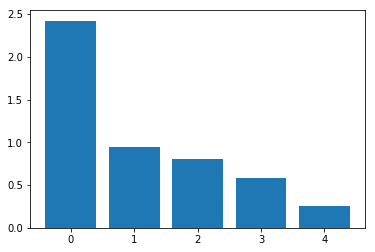

In [13]:
pca =PCA()
pca_transform = pca.fit_transform(X_scaled)
plt.bar(range(pca.n_components_),pca.explained_variance_)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train,y,test_size=0.3,random_state=21)

In [15]:
pipeline_svr = make_pipeline(StandardScaler(),PCA(n_components=5),SVR())
parameters_svr ={'svr__C':np.array(range(175,601,10))/100}

In [16]:
model_svr = GridSearchCV(pipeline_svr,parameters_svr,cv=5)

In [17]:
#model_svr.get_params

In [18]:
model_svr.fit(train,y)

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svr__C': array([1.75, 1.85, 1.95, 2.05, 2.15, 2.25, 2.35, 2.45, 2.55, 2.65, 2.75,
       2.85, 2.95, 3.05, 3.15, 3.25, 3.35, 3.45, 3.55, 3.65, 3.75, 3.85,
       3.95, 4.05, 4.15, 4.25, 4.35, 4.45, 4.55, 4.65, 4.75, 4.85, 4.95,
       5.05, 5.15, 5.25, 5.35, 5.45, 5.55, 5.65, 5.75, 5.85, 5.95])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
model_svr.score(train,y)

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.835565413537118

In [20]:
y_pred = model_svr.predict(test)

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [21]:
y_pred.shape

(173,)

In [22]:
y_pred

array([32.71828686, 23.66492562, 15.49886337, 14.76992362, 17.12841614,
       16.53563465, 18.27225723, 15.30814586, 15.82185337, 15.97811085,
       17.97532534, 19.94852081, 15.8469309 , 14.97121558, 19.1037814 ,
       18.94684476, 20.55979187, 29.04435815, 16.53412724, 27.493762  ,
       20.8081335 , 23.63396484, 21.18360443, 21.52025602, 21.48695166,
       21.04276063, 24.49981612, 22.62136339, 24.41376125, 26.68839391,
       42.08812873, 42.74673889, 36.82745306, 19.3968969 , 16.85165436,
       21.48746279, 18.63006133, 18.09149484, 19.12143955, 19.39774732,
       16.41778539, 20.00767308, 20.76753177, 17.38534883, 14.8017967 ,
       13.60805728, 14.65364306, 17.81005711, 20.22996717, 21.75226495,
       20.12553773, 33.57107989, 46.68473833, 22.50020727, 20.84471875,
       22.12955696, 29.0330756 , 47.61716268, 38.02370467, 36.68805113,
       33.34807129, 42.33946214, 20.55320956, 16.15668415, 19.4725387 ,
       21.4672106 , 22.8657151 , 25.35397833, 18.36976512, 22.86

In [23]:
House_price_svr = pd.DataFrame({
    "Id" : test["ID"],
    "medv" : y_pred
})

In [24]:
House_price_svr.to_csv("House_price_svr.csv", index = False)